Grupo: Rafael Pérez y Pablo Pérez

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import statistics
import scipy.stats as stats
from sklearn.metrics import r2_score
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Carga del dataframe

In [4]:
overall = pd.read_csv("/sample_data/2017_german_election_overall.csv")
overall

,Unnamed: 0,area_id,area_names,state,registered.voters,total_votes,invalid_first_votes,invalid_second_votes,valid_first_votes,valid_second_votes
0,1,1,Flensburg – Schleswig,Schleswig-Holstein,225659,171905,1647,1509,170258,170396
1,2,2,Nordfriesland – Dithmarschen Nord,Schleswig-Holstein,186384,139200,1299,1125,137901,138075
2,3,3,Steinburg – Dithmarschen Süd,Schleswig-Holstein,175950,132016,1133,1141,130883,130875
3,4,4,Rendsburg-Eckernförde,Schleswig-Holstein,199632,157387,1285,1119,156102,156268
4,5,5,Kiel,Schleswig-Holstein,204650,151463,1657,1290,149806,150173
...,...,...,...,...,...,...,...,...,...,...
294,295,295,Zollernalb – Sigmaringen,Baden-Württemberg,183202,139544,2354,1818,137190,137726
295,296,296,Saarbrücken,Saarland,199887,147602,2304,2171,145298,145431
296,297,297,Saarlouis,Saarland,207500,160371,2422,2831,157949,157540
297,298,298,St. Wendel,Saarland,177468,141378,2620,2668,138758,138710


Hemos decidido seleccionar para este ejercicio dos dataframes relacionados entre sí, que tienen datos de las Elecciones Federales de Alemania en 2017. El primer dataframe, llamado overall, nos proporciona información sobre la participación que hubo.

In [5]:
party = pd.read_csv("/sample_data/2017_german_election_party.csv")
party

,Unnamed: 0,area_id,area_name,state,party,votes_first_vote,votes_second_vote
0,1,1,Flensburg – Schleswig,Schleswig-Holstein,Christlich.Demokratische.Union.Deutschlands,68102,58307
1,2,2,Nordfriesland – Dithmarschen Nord,Schleswig-Holstein,Christlich.Demokratische.Union.Deutschlands,62260,52933
2,3,3,Steinburg – Dithmarschen Süd,Schleswig-Holstein,Christlich.Demokratische.Union.Deutschlands,54812,47367
3,4,4,Rendsburg-Eckernförde,Schleswig-Holstein,Christlich.Demokratische.Union.Deutschlands,66625,56584
4,5,5,Kiel,Schleswig-Holstein,Christlich.Demokratische.Union.Deutschlands,45691,40011
...,...,...,...,...,...,...,...
12852,12853,295,Zollernalb – Sigmaringen,Baden-Württemberg,Übrige,0,0
12853,12854,296,Saarbrücken,Saarland,Übrige,0,0
12854,12855,297,Saarlouis,Saarland,Übrige,0,0
12855,12856,298,St. Wendel,Saarland,Übrige,0,0


Este segundo dataframe, trata sobre la cantidad de votos que ha obtenido por cada circuscripción cada partido, pudiendo agrupar estos datos por estado.

# Tipos de datos

In [6]:
overall.dtypes

Unnamed: 0               int64
area_id                  int64
area_names              object
state                   object
registered.voters        int64
total_votes              int64
invalid_first_votes      int64
invalid_second_votes     int64
valid_first_votes        int64
valid_second_votes       int64
dtype: object

En el primer dataframe que hemos cogido, podemos ver cómo casi todos los datos son numéricos enteros. Aún así, excepto el id del area, los valores son numéricos tan grandes que se podrían considerar como numéricos flotantes. Las variables area_names y state son categóricas nominales, pero tienen un número tan grande de categorías posibles (especialmente la primera) que se podrían considerar también como variable de texto.

Lo que representan estos valores es lo siguiente:
- Identificador de la circunscripción de la que se tienen los datos
- Nombre de la circunscripción
- Nombre del estado
- Número de votantes potenciales
- Número total de votos
- Votos inválidos en la primera ronda
- Votos inválidos en la segunda ronda
- Votos válidos en la primera ronda
- Votos válidos en la segunda ronda

In [7]:
party.dtypes

Unnamed: 0            int64
area_id               int64
area_name            object
state                object
party                object
votes_first_vote      int64
votes_second_vote     int64
dtype: object

En este segundo dataframe, tenemos algunas variables que coinciden respecto al primero. Respecto a las nuevas, el partido es una variable categórica nominal, mientras que su número de votos en primera y segunda ronda es numérica entera, aunque podrían interpretarse como numérica flotante.

Representan, a nivel real, lo siguiente:
- Partido del cuál se tienen los datos, para esa circunscripción electoral
- Número de votos al partido en la primera ronda
- Número de votos al partido en la segunda ronda

# Análisis Univariante

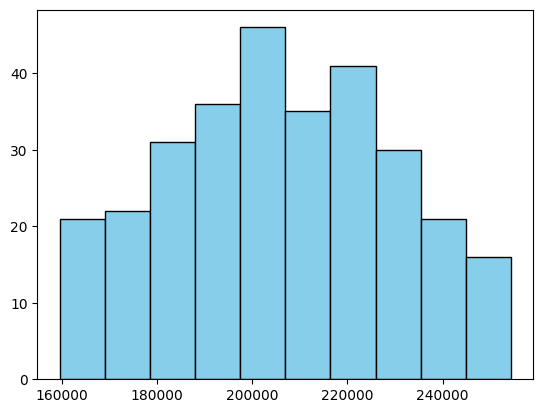

In [8]:
plt.hist(overall['registered.voters'], bins=10, color='skyblue', edgecolor='black')
plt.show()

El primer análisis que podemos hacer sobre el dataframe de overall es el número de votantes que tenemos en cada circunscripción. Parece ser que nos encontramos con que hay unos 200000 votantes de media por cada una, siguiendo estos datos una distribución normal. Se van a sacar ahora la media y la desviación típica de estos datos para obtener una mejor visión de estos.

In [9]:
print(round(overall['registered.voters'].mean()))
print(round(overall['registered.voters'].std()))

206273
23258


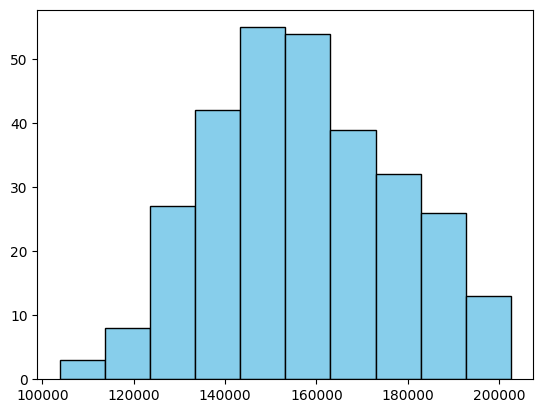

In [10]:
plt.hist(overall['total_votes'], bins=10, color='skyblue', edgecolor='black')
plt.show()

In [11]:
print(round(overall['total_votes'].mean()))
print(round(overall['total_votes'].std()))

157103
20044


De la misma manera, podemos ver que el número de votantes también representa una distribución normal. En este caso, tiene una media de 157103 votantes, con su desviación típica de 20044.

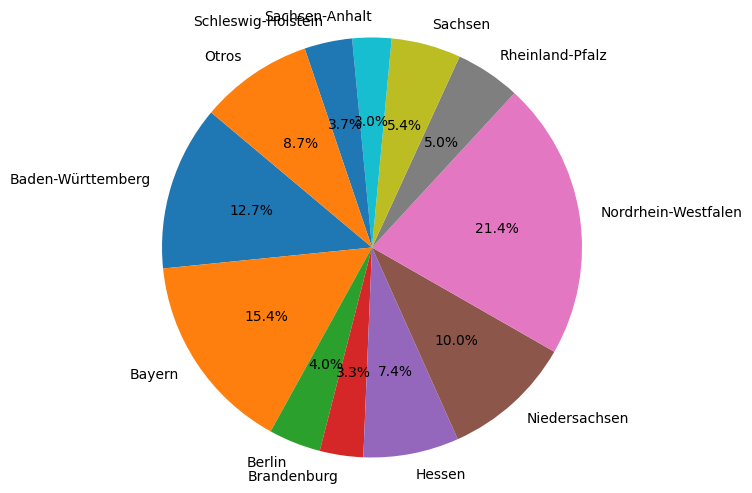

In [12]:
porcentaje_circunscripcion = overall.groupby('state')['area_names'].nunique() / overall['area_names'].nunique() * 100
otros = porcentaje_circunscripcion[porcentaje_circunscripcion < 3].sum()
porcentaje_circunscripcion = porcentaje_circunscripcion[porcentaje_circunscripcion >= 3]
porcentaje_circunscripcion['Otros'] = otros
plt.figure(figsize=(8, 6))
plt.pie(porcentaje_circunscripcion, labels=porcentaje_circunscripcion.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()

Aquí podemos ver cuál es el porcentaje de circunscripciones sobre el total que corresponde a cada estado. Por lo que se visualiza, Nordrhein-Westfalen tiene más de un 20% de las circunscripciones totales, con Bayern teniendo más de un 15%.

# Análisis bivariante

0.8816688414024056


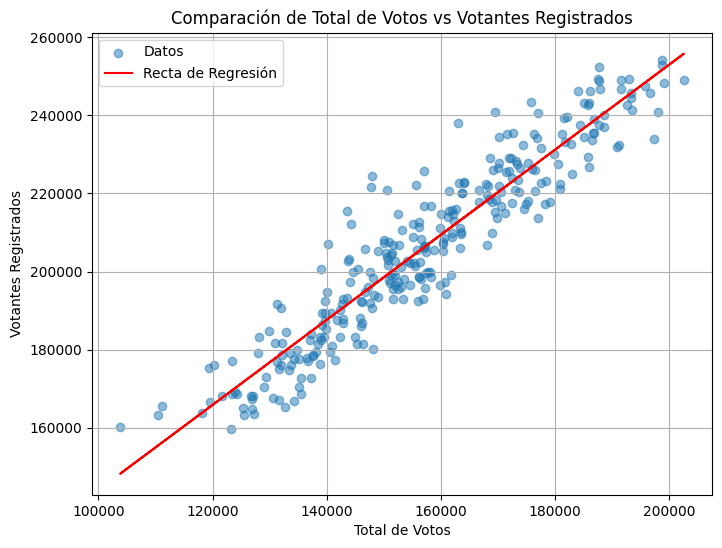

In [13]:
x = overall['total_votes']
y = overall['registered.voters']
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
r_squared = r2_score(y, polynomial(x))
print(r_squared)
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5, label='Datos')
plt.plot(x, polynomial(x), color='red', label='Recta de Regresión')
plt.title('Comparación de Total de Votos vs Votantes Registrados')
plt.xlabel('Total de Votos')
plt.ylabel('Votantes Registrados')
plt.legend()
plt.grid(True)
plt.show()

Ha habido una tendencia muy clara respecto al número de votantes que no han ido a votar en cada circunscripción, existiendo una relación lineal entre estas dos variables, cómo era de esperar. Esta relación explica un 88% de la cantidad de votantes que hay respecto a los votantes potenciales que podría haber.

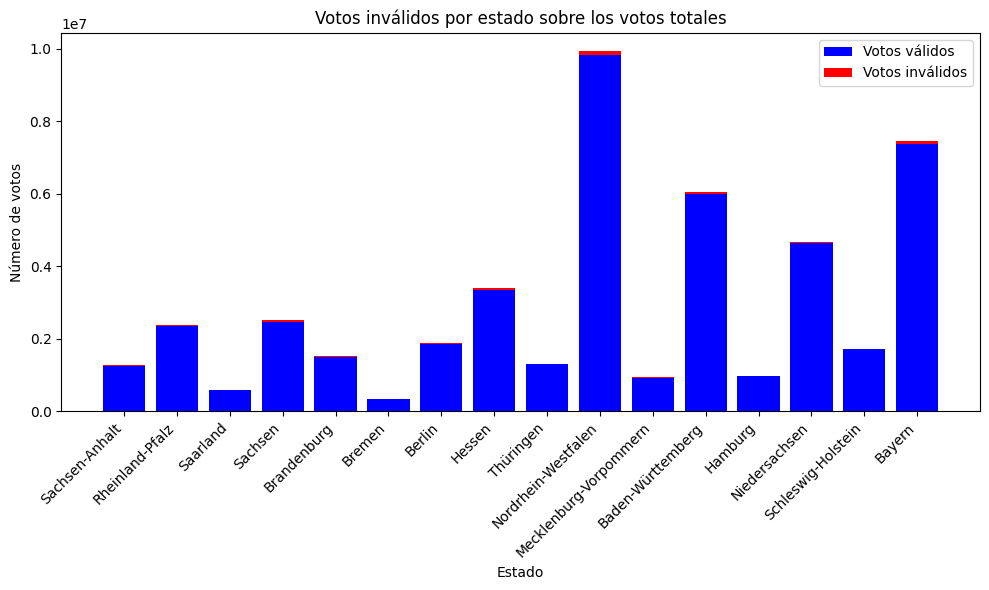

In [14]:
grouped_data = overall.groupby('state').sum()
grouped_data['invalid_percentage'] = grouped_data['invalid_first_votes'] / grouped_data['total_votes'] * 100
grouped_data.sort_values('invalid_percentage', ascending=False, inplace=True)
plt.figure(figsize=(10, 6))
plt.bar(grouped_data.index, grouped_data['total_votes'], label='Votos válidos', color='blue')
plt.bar(grouped_data.index, grouped_data['invalid_first_votes'], label='Votos inválidos', color='red', bottom=grouped_data['valid_first_votes'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Estado')
plt.ylabel('Número de votos')
plt.title('Votos inválidos por estado sobre los votos totales')
plt.legend()
plt.tight_layout()
plt.show()

Como se puede observar en la gráfica, el número de votos inválidos en cada estado ha sido prácticamente mínimo. Aún así, para poder ver mejor la situación se han ordenado las barras por porcentaje de votos inválidos, lo que nos indica que Sachsen-Anhalt ha sido el estado con más votos inválidos, y Bayern el que menos.

# Normalidad de las variables

In [15]:
overall['ratio_invalid'] = overall['invalid_first_votes'] / overall['total_votes']
overall['ratio_invalid']

0      0.009581
1      0.009332
2      0.008582
3      0.008165
4      0.010940
         ...   
294    0.016869
295    0.015610
296    0.015102
297    0.018532
298    0.018275
Name: ratio_invalid, Length: 299, dtype: float64

<ipython-input-16-76cb5e4af240>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(overall['ratio_invalid'], shade=True)


<Axes: xlabel='ratio_invalid', ylabel='Density'>

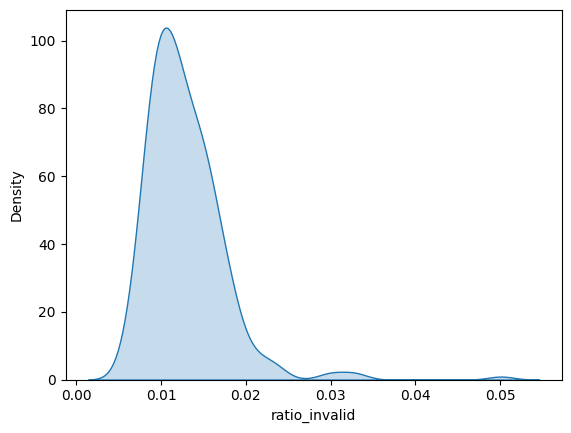

In [16]:
sns.kdeplot(overall['ratio_invalid'], shade=True)

Vamos a analizar, continuando con la misma dinámica que antes, la distribución de una nueva variable creada, que representa el porcentaje de votos inválidos sobre el total de votos. Al visualizar la función densidad de esta, se puede ver cómo sigue una distribución normal ligeramente asimétrica positiva.

In [17]:
!pip install distfit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.4 MB/s eta 0:00:00


In [18]:
from distfit import distfit

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 4415.78] [loc=0.013 scale=0.005]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 17295] [loc=0.006 scale=0.007]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 17295] [loc=-524287.994 scale=524288.000]
[distfit] >INFO> [dweibull  ] [0.03 sec] [RSS: 3348.5] [loc=0.012 scale=0.003]
[distfit] >INFO> [t         ] [0.33 sec] [RSS: 3258.89] [loc=0.012 scale=0.003]
[distfit] >INFO> [genextreme] [0.20 sec] [RSS: 684.015] [loc=0.011 scale=0.003]
[distfit] >INFO> [gamma     ] [0.10 sec] [RSS: 397.532] [loc=0.005 scale=0.002]
[distfit] >INFO> [lognorm   ] [0.21 sec] [RSS: 476.09] [loc=0.004 scale=0.008]
[distfit] >INFO> [beta      ] [0.21 sec] [RSS: 422.778] [loc=0.005 scale=10775347307.718]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 36949.5] [loc=0.006 scale=0.044]
[distfit] >INFO> [loggamma  ] [0.09 sec] [RSS: 4962.87] [loc=-1.763 scale=0.230]
[distfit] >INFO> Compute confidence intervals [parametri

gamma
(3.008815752674097, 0.005379028865388163, 0.002470016607020853)


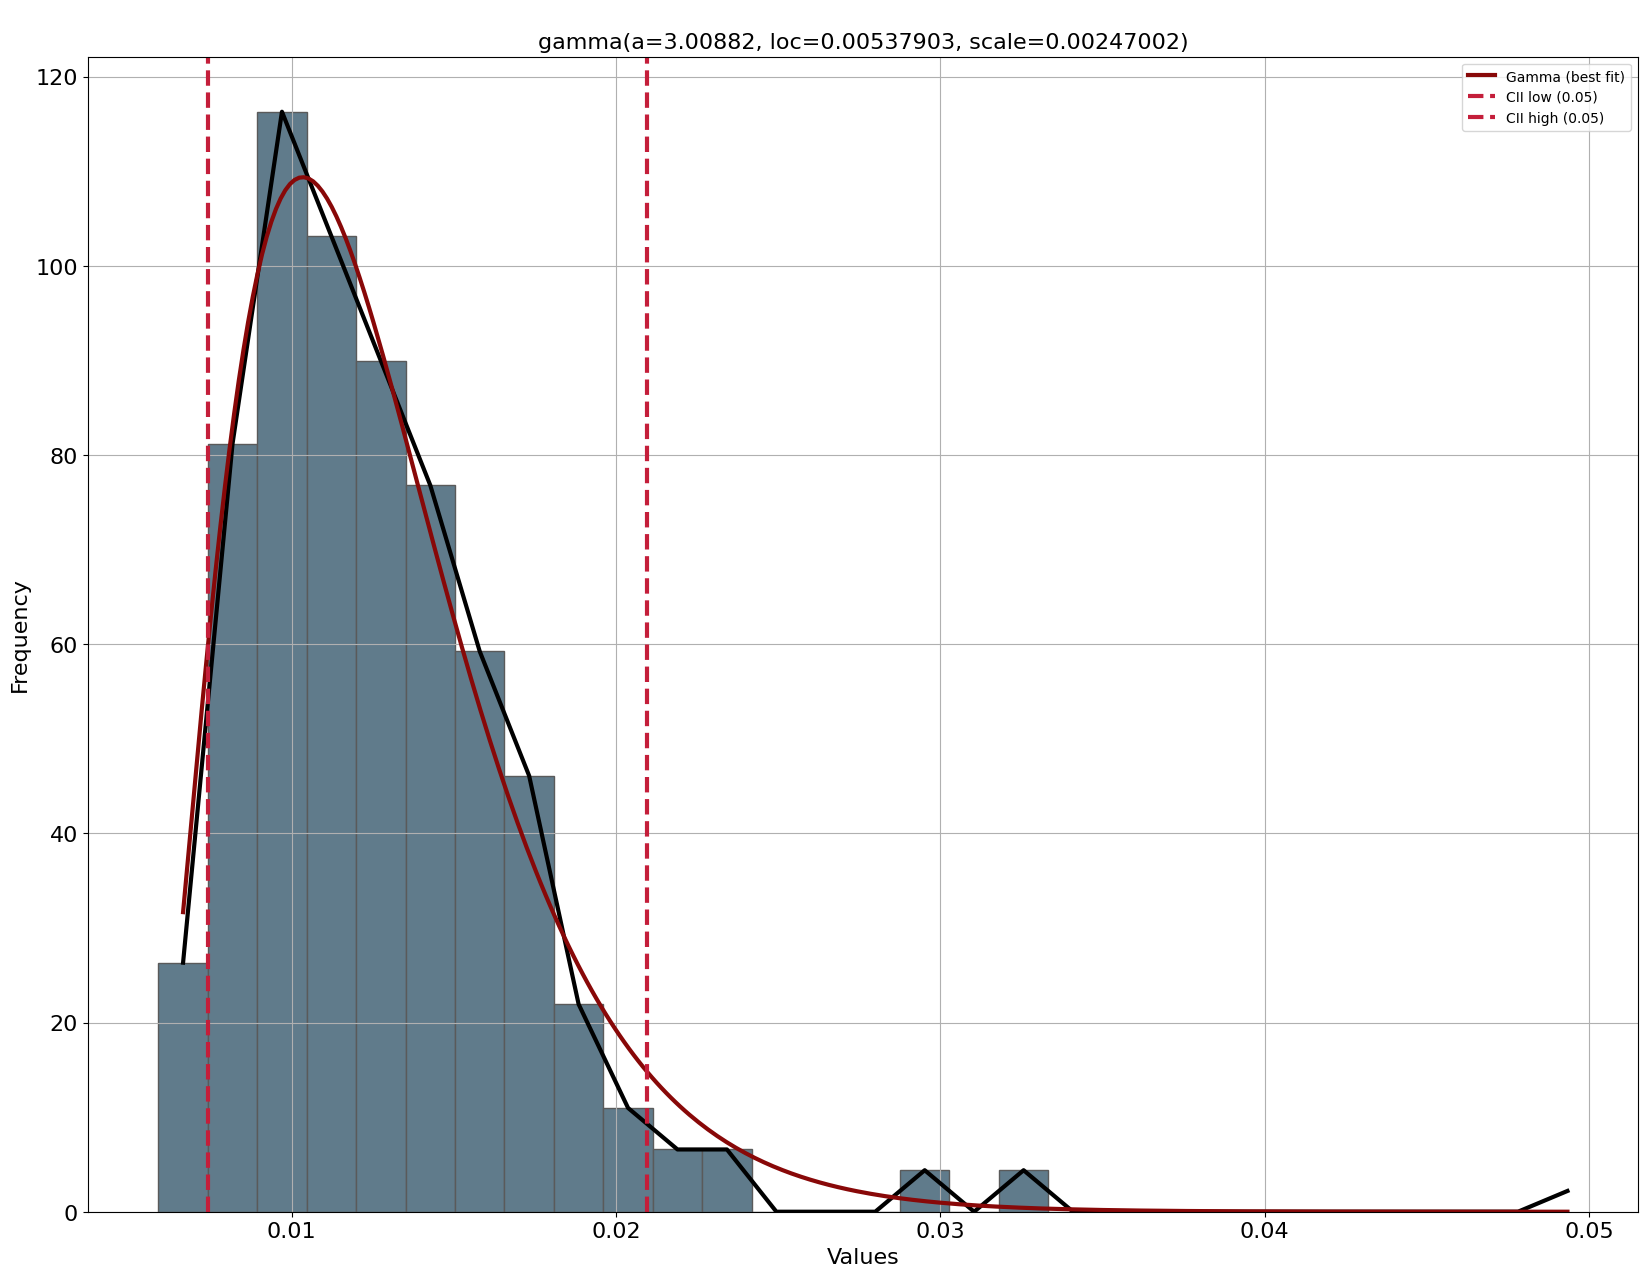

In [19]:
dist = distfit()

dist.fit_transform(overall['ratio_invalid'])

best_dist_name = dist.model['name']

params = dist.model['params']

dist.plot()

print(best_dist_name)
print(params)

Según la función distfit, que nos indica que distribución de las principales sigue nuestra variable, el porcentaje de votos inválidos sigue una distribución gamma con una A igual a 3, un lambda igual a 0.0053 y una escala de 0.0024. A pesar de esto, vemos que la distribución beta estaría bastante cercano a esta, y al ser más simple, podríamos concluir que la variable sigue esta última distribución.

In [20]:
stats.gamma.cdf(0.01, 3.008815752674097,
                  loc=0.005379028865388163,
                  scale=0.002470016607020853)

0.2864513491804786

In [21]:
1- stats.gamma.cdf(0.02, 3.008815752674097,
                  loc=0.005379028865388163,
                  scale=0.002470016607020853)

0.06627013830582806

Por utilizar un poco esta distribución gamma que nos ha dado distfit, podemos ver que, de forma teórica, hay un 28,65% de los valores que están por debajo del 0.01 y un 6,63% de los valores que están por encima de 0.02

# Estimación puntual

In [22]:
party_filtered = party[party['votes_first_vote'] != 0]

party_stats = party_filtered.groupby('party')['votes_first_vote'].agg(['mean', 'median']).reset_index()

print(party_stats)

                                                party          mean   median
0         Ab.jetzt...Demokratie.durch.Volksabstimmung   3157.500000   3157.5
1                         Alternative.für.Deutschland  18587.744755  16375.5
2                                        Bayernpartei   2606.500000   2445.0
3                               BÜNDNIS.90.DIE.GRÜNEN  12474.617450  11031.5
4                Bündnis.C...Christen.für.Deutschland    428.750000    381.5
5                    Bürgerrechtsbewegung.Solidarität    592.333333    405.0
6         Christlich.Demokratische.Union.Deutschlands  55445.865613  55223.0
7             Christlich.Soziale.Union.in.Bayern.e.V.  70774.000000  73149.0
8                                         DIE.EINHEIT    186.500000    186.5
9                                           DIE.LINKE  13308.842282   9566.0
10                                         DIE.RECHTE    194.333333    185.0
11                     Deutsche.Kommunistische.Partei    469.625000    421.5

Ahora, fijándonos en el otro dataset, vamos a realizar una estimación puntual de la distribución de los datos. Se ha agrupado por partidos y se ha sacado la media y la mediana de votos en primera ronda para cada uno de ellos. Previamente, se han eliminado los valores que tenían 0, ya que no todos los partidos se presentan a todos los estados.

Merece la pena mencionar que la moda no se ha calculado con un sentido. Al ser la variable "votes_first_vote" una variable que, aunque sea discreta, se puede considerar continua por su naturaleza, no tiene sentido calcular la moda, ya que los valores no se van a repetir prácticamente.

El partido con mayor votación media en las circunscripciones que se ha presentado es la Unión Social Cristiana de Baviera, mientras que el que menos votos ha conseguido de media por circunscripción es el partido La Unidad.

In [23]:
party_filtered = party[party['votes_first_vote'] != 0]

merged_df = pd.merge(party_filtered, overall, on='area_id')

merged_df['percentage_votes'] = merged_df['votes_first_vote'] / merged_df['valid_first_votes'] * 100

party_stats = merged_df.groupby('party')['percentage_votes'].agg(['mean', 'median']).reset_index()

print(party_stats)

                                                party       mean     median
0         Ab.jetzt...Demokratie.durch.Volksabstimmung   1.760270   1.760270
1                         Alternative.für.Deutschland  12.087987  10.450253
2                                        Bayernpartei   1.675366   1.340046
3                               BÜNDNIS.90.DIE.GRÜNEN   7.883260   6.879828
4                Bündnis.C...Christen.für.Deutschland   0.273573   0.254896
5                    Bürgerrechtsbewegung.Solidarität   0.379455   0.237815
6         Christlich.Demokratische.Union.Deutschlands  35.880651  35.483590
7             Christlich.Soziale.Union.in.Bayern.e.V.  44.394145  45.605021
8                                         DIE.EINHEIT   0.108593   0.108593
9                                           DIE.LINKE   8.634473   6.042772
10                                         DIE.RECHTE   0.118472   0.111156
11                     Deutsche.Kommunistische.Partei   0.308984   0.274663
12          

Pero realmente los valores anteriores no nos dan algo realmente significativo, ya que cada circunscripción tiene un número de votantes diferente. Por lo tanto, si juntamos ambos dataframes podríamos obtener el porcentaje de votos por circunscripción sobre el total, para saber realmente cuál es el impacto de media de cada partido.

Ya podemos cuantificar el enorme impacto de la Unión Social Cristiana de Baviera, con un 45% de votos en la mediana de las circunscripciones. Efectivamente, el 0.10% de los votos de media de La Unidad en las circunscripciones en las que se presenta (parece ser que sólo 1 al ser igual la media y la mediana) es el valor más bajo de esta tabla.

# Intervalos

In [24]:
confidence_intervals = []
for party in merged_df['party'].unique():
    party_data = merged_df[merged_df['party'] == party]['percentage_votes']
    confidence_interval = stats.t.interval(0.95, len(party_data)-1, loc=party_data.mean(), scale=stats.sem(party_data))
    confidence_intervals.append((party, confidence_interval))

confidence_intervals_filtered = [(party, interval) for party, interval in confidence_intervals if not (np.isnan(interval[0]) or np.isnan(interval[1]))]

for party, interval in confidence_intervals_filtered:
    print(f'{party}, {interval}')

Christlich.Demokratische.Union.Deutschlands, (34.99676806421374, 36.76453317029765)
Sozialdemokratische.Partei.Deutschlands, (23.844190964058313, 25.73425724100712)
DIE.LINKE, (7.9700758488320655, 9.298869725193315)
BÜNDNIS.90.DIE.GRÜNEN, (7.407600041623796, 8.358919448630832)
Freie.Demokratische.Partei, (6.749109445197436, 7.185997814382277)
Alternative.für.Deutschland, (11.43707298757532, 12.738900954987674)
FREIE.WÄHLER, (1.842340077287172, 2.3354820171105577)
Übrige, (0.48446545950088615, 1.1499294005424472)
Marxistisch.Leninistische.Partei.Deutschlands, (0.1968650266113626, 0.24514205429353111)
Partei.für.Arbeit..Rechtsstaat..Tierschutz..Elitenförderung.und.basisdemokratische.Initiative, (1.6504430554194625, 2.0299378200128393)
Neue.Liberale...Die.Sozialliberalen, (0.03662329213604351, 0.3087697903405806)
Nationaldemokratische.Partei.Deutschlands, (0.46312248612791346, 1.151677939575716)
Ökologisch.Demokratische.Partei, (1.224382923622067, 1.5322606606185285)
PARTEI.MENSCH.UMWELT.

Por último, calcularemos los intervalos de confianza para la media de estos porcentajes. Realmente, este valor para nuestro dataset no tiene un significado real, ya que nos serviría para calcular, en caso de tener una muestra, con una seguridad de un 95%, en qué rango se encuentra la media real. Aquí tenemos todos los datos de las votaciones, por lo que no nos serviría de mucho.

# Contraste de hipótesis

In [25]:
grupo_verdes = party_filtered[party_filtered['party'] == 'BÜNDNIS.90.DIE.GRÜNEN']
grupo_liberales = party_filtered[party_filtered['party'] == 'Freie.Demokratische.Partei']

t_stat, p_valor = ttest_ind(grupo_verdes['votes_first_vote'], grupo_liberales['votes_first_vote'])

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)

nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay evidencia suficiente para decir que las medias son diferentes.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para decir que las medias son diferentes.")

Estadístico t: 3.4395098686808785
Valor p: 0.0006235476268349241
Se rechaza la hipótesis nula. Hay evidencia suficiente para decir que las medias son diferentes.


La primera hipótesis que se va a lanzar va a ser una comparativa de medias. Miraremos si la media de votos por circunscripción del partido Alianza 90/Los Verdes es igual a la media de votos por circunscripción del Partido Democrático Libre. Para ello tomaremos el nivel de significacia habitual (5%) y realizaremos la prueba de t de student. La hipótesis nula nos dirá que ambas medias son iguales.

Después de hacer la prueba, vemos que el estadístico t da un valor de un 3.44 y el valor de p es muy pequeño (0.0006), por lo que la hipótesis nula se rechaza claramente.

In [26]:
merged_df['percentage_votes'] /= 100

filtered_df = merged_df[merged_df['party'].isin(['Christlich.Demokratische.Union.Deutschlands', 'Sozialdemokratische.Partei.Deutschlands'])]

observed_values = filtered_df.pivot_table(index='party', columns='area_names', values='percentage_votes', aggfunc='mean').values

expected_values = np.outer(filtered_df.groupby('party')['percentage_votes'].mean(),
                            filtered_df.groupby('area_names')['percentage_votes'].mean())

chi2, p_value = chi2_contingency(observed_values)[0:2]

print("Estadístico Chi-cuadrado:", chi2)
print("Valor p:", p_value)

Estadístico Chi-cuadrado: nan
Valor p: nan


# Análisis de la Varianza (ANOVA)

En la siguiente prueba realizaremos un Análisis de la Varianza con el objetivo de comprobar si, entre los 5 partidos políticos más votados, la distribución de sus votos por circunscripción es la misma en todos los estados.

A diferencia del test anterior, donde únicamente comparábamos los partidos "Alianza 90/Los Verdes" y "Partido Democrático Libre", el test ANOVA nos permite comprobar los 5 partidos seleccionados o más, a la misma vez, para analizar si la hipótesis que planteamos se cumple o no.

In [27]:
np.random.seed(12)

parties = ["Christlich.Soziale.Union.in.Bayern.e.V.", "Christlich.Demokratische.Union.Deutschlands",
           "Sozialdemokratische.Partei.Deutschlands", "Alternative.für.Deutschland", "DIE.LINKE"]

data = []
for party in parties:
    data.extend([(party, vote) for vote in stats.poisson.rvs(loc=18, mu=30, size=200)])


voter_frame = pd.DataFrame(data, columns=["party", "votes"])


groups = voter_frame.groupby("party")["votes"]

# Hacemos el ANOVA
anova_result = stats.f_oneway(*[group for name, group in groups])

print(anova_result)


F_onewayResult(statistic=1.9309394757651879, pvalue=0.10313883461408492)


El resultado de la prueba arroja una estadística F de 1,931 y un valor p de 0,1031, lo que indica que no hay una diferencia significativa entre las medias de cada grupo.

Utilizamos también el segundo método que hemos visto, utilizando la librería "statsmodels":

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('votes ~ C(party)',
            data=voter_frame).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

             sum_sq     df         F    PR(>F)
C(party)    218.956    4.0  1.930939  0.103139
Residual  28206.635  995.0       NaN       NaN


Cómo se puede comprobar, el método statsmodels ha producido la misma estadística F y valor P (enumerados como PR(<F)) que el método stats.f_oneway.

In [29]:
np.random.seed(12)

parties = ["Christlich.Soziale.Union.in.Bayern.e.V.", "Christlich.Demokratische.Union.Deutschlands",
           "Sozialdemokratische.Partei.Deutschlands", "Alternative.für.Deutschland", "DIE.LINKE"]

party_votes = np.random.choice(a=parties,
                               p=[0.05, 0.15, 0.25, 0.05, 0.5],
                               size=1000)

votes = stats.poisson.rvs(loc=18, mu=30, size=1000)

voter_frame = pd.DataFrame({"party": party_votes, "votes": votes})

groups = voter_frame.groupby("party").groups

# Extraemos cada partido
csu = voter_frame.loc[groups["Christlich.Soziale.Union.in.Bayern.e.V."]]['votes']
cdu = voter_frame.loc[groups["Christlich.Demokratische.Union.Deutschlands"]]['votes']
spd = voter_frame.loc[groups["Sozialdemokratische.Partei.Deutschlands"]]['votes']
afd = voter_frame.loc[groups["Alternative.für.Deutschland"]]['votes']
linke = voter_frame.loc[groups["DIE.LINKE"]]['votes']

# Hacemos el ANOVA
anova_result = stats.f_oneway(csu, cdu, spd, afd, linke)
print(anova_result)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)


In [30]:
model = ols('votes ~ C(party)',
            data=voter_frame).fit()

anova_result = sm.stats.anova_lm(model, typ=2)
print(anova_result)

             sum_sq     df         F    PR(>F)
C(party)    199.369    4.0  1.774469  0.131732
Residual  27948.102  995.0       NaN       NaN


Como podemos comprobar, el resultado obtenido es que los partidos políticos no tienen las mismas medias muestrales, ya que el valor p es significativo con un nivel de convianza del 99,5%.